# Análise de dados e introdução a Regressão

Vamos utilizar um dataset de uma amostra da população brasileira para treinar nossos conceitos de regressão.

Nesse dataset temos informações sobre 66470 invidividuos pesquisados pelo censo e extraimos 8 variáveis:
- id
- idade
- sexo
- cor/raca
- salario
- estado_civil
- regiao
- Educação


Nossos pontos de interesse serão:

- Análise multivariada.
- Transformações nas distribuições para serem usadas em uma regressão.
- Tratamento de variáveis categóricas.
- O que seria afinal uma variável categórica?

Algumas perguntas que poderemos responder:

- Pessoas casadas ganham mais que pessoas solteiras?
- Existe diferença salarial entre as diferentes regiões do país?
- O salário aumenta com a idade?
- Vale a pena estudar mais para ganhar maiores salarios? Estudar até quando?


## Forma do modelo linear

$y = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_nx_n$
- $y$ é a variável dependente (a resposta)
- $\beta_0$ é o termo de intercepção
- $\beta_1$ é o coeficiente para $x_1$ 
- $\beta_n$ é o coeficiente para $x_n$

Os **$\beta$** são os chamados **_Coeficientes do modelo_**

- Esses valores são estimados (ou "aprendidos") no processo de adaptação do modelo utilizando o critério ** mínimos quadrados **.
- Especificamente, encontramos a linha (matematicamente) que minimiza a adição ** de quadrados de resíduos ** (ou “total de erros quadráticos”).
- E quando já tivermos aprendido esses coeficientes, podemos usar o modelo para prever a resposta.

## Pré-requisitos do modelo de regressão Linear

A maioria dos testes estatísticos depende de suposições sobre as variáveis. Para tirar conclusões sobre as estimativas para um modelo de regressão linear, quatro suposições são feitas sobre o comportamento dos dados:

- A relação entre as variáveis de resposta e de previsão é **linear** na natureza.
- Os erros são **independentes**. 
- Os erros possuem distribuições **normal**. 
- Os erros têm a **mesma** variância.


**LINEAR**
- Se a relação entre as variáveis ​​de resposta e preditor não for linear, os resultados da análise de regressão irão subestimar a verdadeira relação. Isso é melhor verificado com um gráfico de dispersão dos valores previstos versus os valores observados.


**INDEPENDENTES**
- Séries autocorrelacionadas o que não é o nosso caso. Um gráfico de latência dos resíduos verifica se eles são aleatórios. Se aleatório, os dados não devem exibir nenhuma estrutura identificável em um gráfico de latência.


**NORMAL**
- Se a distribuição de erro for significativamente não normal, os intervalos de previsão não serão confiáveis. O melhor teste para erros normalmente distribuídos é um gráfico de probabilidade normal dos resíduos . Se a distribuição for normal, os pontos em tal plotagem devem se aproximar da linha de referência diagonal.


- As violações da normalidade freqüentemente surgem porque as distribuições das variáveis ​​são significativamente não-normais e / ou a suposição de linearidade é violada. Em tais casos, uma transformação não linear de variáveis pode resolver ambos os problemas. Se as distribuições de algumas das variáveis ​​forem extremamente assimétricas ou de cauda longa, elas podem não se encaixar em um modelo linear com erros normalmente distribuídos.


- Como os dados reais raramente apresentam erros que normalmente são distribuídos normalmente e, como uma violação significativa da suposição de distribuição normal pode indicar outro problema com as premissas do modelo e / ou a presença de pontos de dados influentes, geralmente é útil se concentrar mais em quaisquer violações de dados. as outras suposições e / ou a influência de alguns outliers (que podem ser os principais responsáveis ​​por violações da normalidade de qualquer maneira).


**VARIÂNCIA**
- Se a variação dos erros for marcadamente diferente em vários valores, isso pode levar à distorção dos resultados e enfraquecer a análise. Essa suposição pode ser verificada examinando-se um gráfico residual dos valores previstos versus os resíduos padronizados . Idealmente, os resíduos são aleatoriamente espalhados em torno de 0, fornecendo uma distribuição relativamente uniforme. A largura vertical da dispersão não deve aparecer para aumentar ou diminuir os valores ajustados.


**Regressões Simples**

- O objetivo é ajustar a inclinação (w1 nesse exemplo) e o intercepto (b) de modo que a regressão linear (a "linha" laranja) minimize a soma dos resíduos (as distâncias entre as observações, "bolas azuis" e os valores esperados pela regressão, os resíduos são as distâncias verticais.)

<img src="img/linear_regression_scheme.png" width="450" />


#### Gerando dados para treinarmos.

- rng é o método de números aleatórios que estamos criando com um seed fixo (123) para tornar-se reprodutivel;
- Como vamos gerar duas variáveis, vamos definir duas médias, 100 e 1000;
- Na variável cov está o "truque" para gerar dados fakes para uma regressão linear, estamos definindo uma matriz 2x2 (2 linhas e 2 colunas) e dizendo que a covariância entre as duas séries de números aleatórios que estamos criando **não** são independentes e essa não independencia é o que vamos tentar capturar com a regressão linear.
- Na variável sample estamos criando duas distribuições normal que seguem certa regra de covariância que passamos, por isso a ideia de elas são "multivariadas" (ou seja, os valores de uma série dependem da outra).


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_formats=['svg']


Começaremos com a regressão linear mais familiar, um ajuste linear aos dados. Um ajuste em linha reta é um modelo da forma de:
$$y = a * x + b $$

Onde $b$ é chamado de intercepto e $a$ de inclinação.

Considere os seguintes dados, que estão espalhados sobre uma linha com uma inclinação de 4 e um intercepto de -5:

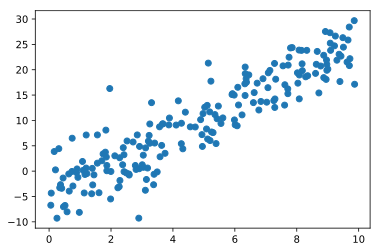

In [3]:
rng = np.random.RandomState(42)

x = 10 * rng.rand(200)
y = 3 * x  -5 + 4*rng.randn(200)

plt.scatter(x, y)

#### Solução analitica
 $w = (X^T X)^{-1} X^T y$
 
 [derivação](https://stats.stackexchange.com/questions/46151/how-to-derive-the-least-square-estimator-for-multiple-linear-regression) 
<br>


Onde:
- w é o **vetor** de pesos (nossos parâmetros estimados)
- X é a matriz de valores, onde cada linha é uma observação e cada coluna é uma variável
- o Sobrescrito T indica "Transposto", ou seja, a matriz com um T é a matriz transposta.
- y é simplesmente o vetor da variável y.

In [12]:
X = x[:, np.newaxis]

# Um ponto importante aqui é adicionar uma coluna de "1s" que será nosso intercepto.
Xb = np.hstack((np.ones((X.shape[0], 1)), X))
w = np.zeros(X.shape[1])

z = np.linalg.inv(np.dot(Xb.T, Xb))
w = np.dot(z, np.dot(Xb.T, y))
b, w1 = w[0], w[1]
print('Intercepto: %.2f' % b)
print('Inclinação: %.2f' % w1)

Intercepto: -5.14
Inclinação: 3.06


Intercepto beta_0:  -5.135054100148473
Inclinação beta_1:  3.05797193870835


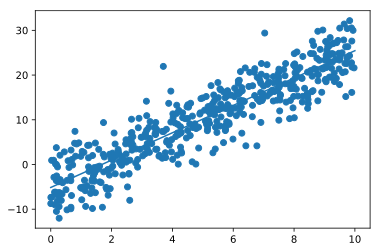

In [13]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=True)

model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 10, 100)
yhat = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yhat)

print("Intercepto beta_0: ", model.intercept_)
print("Inclinação beta_1: ", model.coef_[0])

#### Qualidade do Ajuste

#### Erros Quadraticos Médios 
(MSE, Mean Squared Error)

$$MSE = \frac{1}{n} \sum_{i=1}^{n} \big(y_i - \hat{y_i}\big)^2$$

- Note que o MSE é dependente da escala, e retorna $unidade^2$



In [14]:
y_predicted = x*w1 + b
mse = np.mean((y - y_predicted)**2)
mse

15.905333715527409

In [15]:
# R = Root, Raiz
rmse = np.sqrt(mse)
rmse

3.988149159137282

Text(0.5,0,'index')

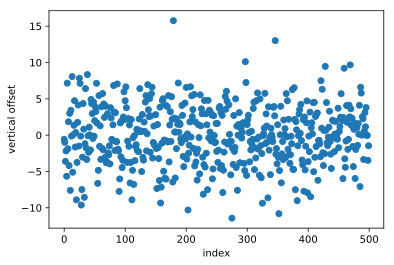

In [16]:
plt.scatter(np.arange(x.shape[0]), y - y_predicted)
plt.ylabel('vertical offset')
plt.xlabel('index')

#### Coeficiente de Determinação 
ou $R^2$

- Soma total dos quadrados (variabilidade da variável resposta ou alvo, proporcional à variância do y):

$$SS_{total} = \sum_{i=1}^{n} \big( y_i - \bar{y_i} \big)^2$$

- Soma dos Residuos ao Quadrado:

$$SS_{residual} = \sum_{i=1}^{n} \big( \hat{y_i} - \bar{y_i} \big)^2$$

- Coeficiente de Determinação $R^2$:

$$R^2 = \frac{SS_{residual}}{SS_{total}}$$

In [18]:
# Método raiz
mean_y = np.mean(y)
SS_total = np.sum((y - mean_y)**2)
SS_residual = np.sum((yhat - mean_y)**2)
r_squared = SS_residual / SS_total
r_squared

0.1621615323645781

In [19]:
# método nutella
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x, y)
r_value**2

0.8379164761712601

In [20]:
# exemplos com arquivo ibge
# mostrar a diferença entre regressão correlação